In [110]:
import numpy as np, pandas as pd

In [111]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

In [112]:
train = pd.read_csv('titanic_train.csv')

In [113]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

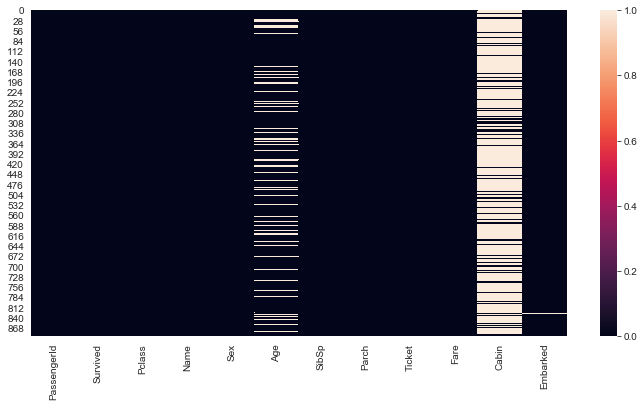

In [114]:

sns.heatmap(train.isnull())

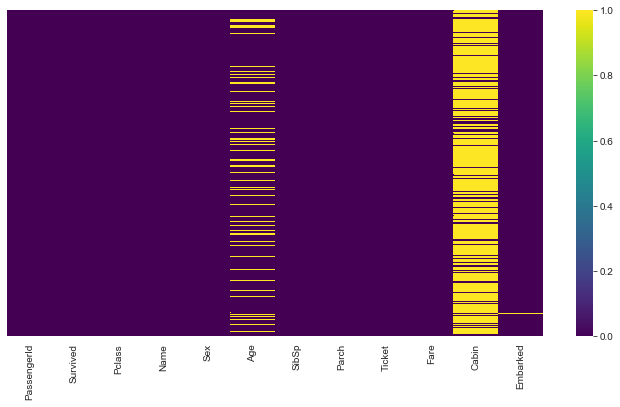

In [115]:

sns.heatmap(train.isnull(),yticklabels=False, cmap='viridis')

In [116]:
sns.set_style("whitegrid")

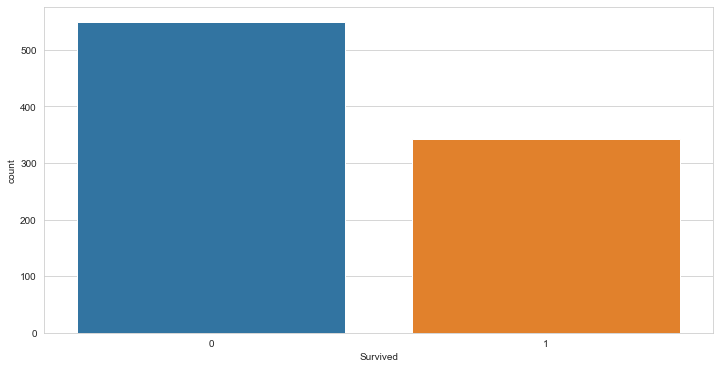

In [117]:

sns.countplot('Survived',data=train)

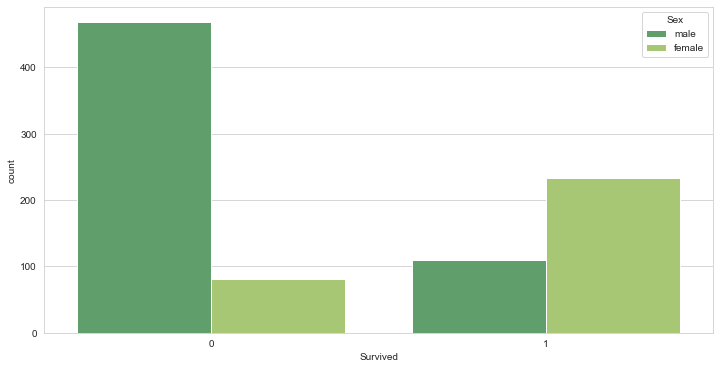

In [118]:

sns.countplot(x='Survived',hue='Sex',data=train,palette='summer')

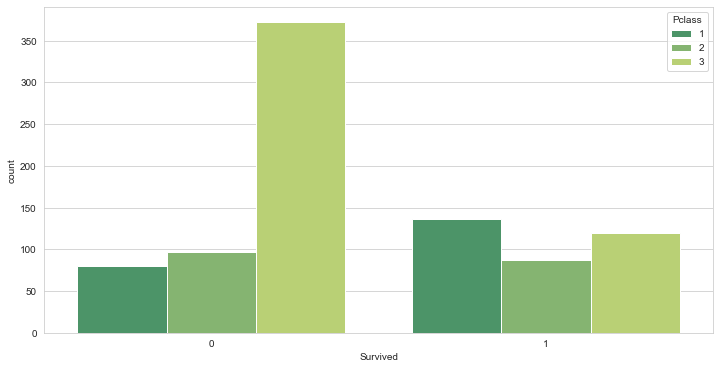

In [119]:

sns.countplot(x='Survived',hue='Pclass',data=train,palette='summer')

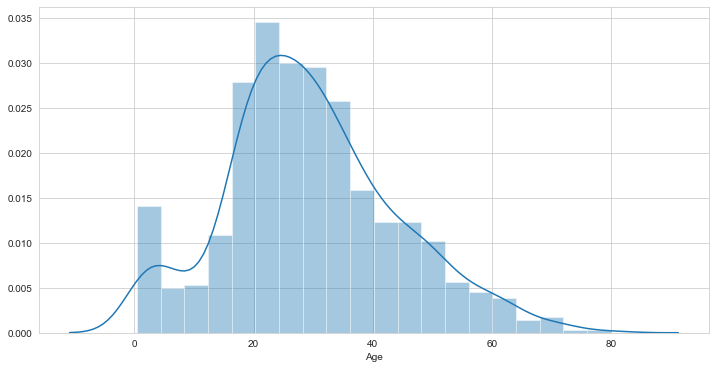

In [120]:

sns.distplot(train['Age'])

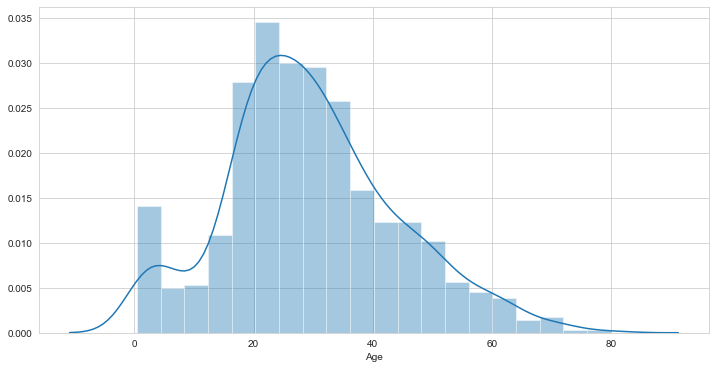

In [121]:

sns.distplot(train['Age'].dropna())

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


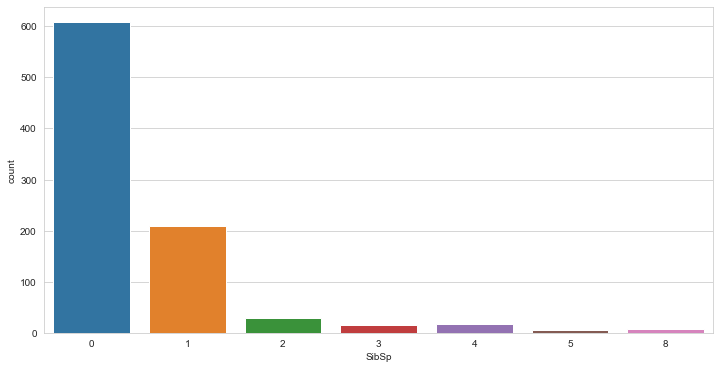

In [123]:
sns.countplot(x='SibSp', data= train)

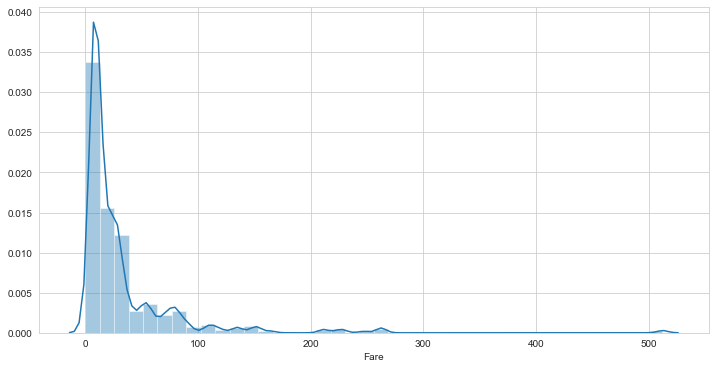

In [124]:
sns.distplot(train['Fare'],bins=40)

In [125]:
import cufflinks as cf
cf.go_offline()

In [126]:
train['Fare'].iplot(kind='hist',bins=40)

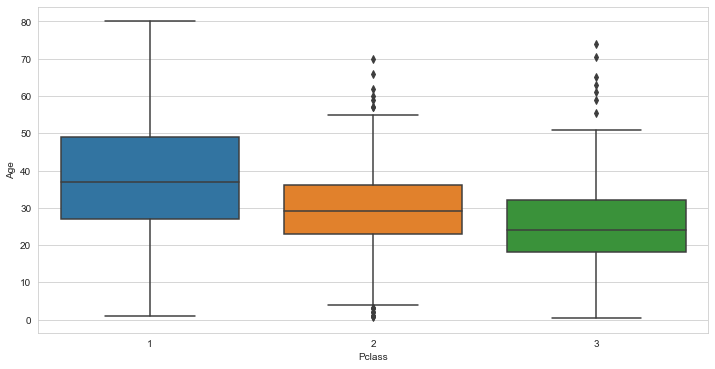

In [127]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [128]:
train['Age'].iplot(kind='box')

In [129]:
def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 24
        else:
            return 24
    else:
        return Age

In [130]:
train['Age'] = train[['Age','Pclass']].apply(imputeAge, axis=1)

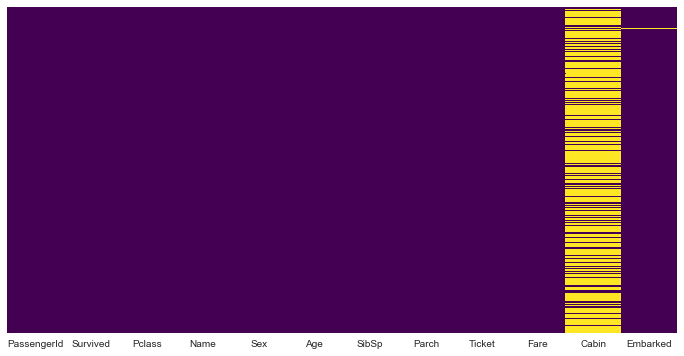

In [131]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False ,cmap='viridis')

In [132]:
train.drop('Cabin',axis=1, inplace=True)

In [133]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

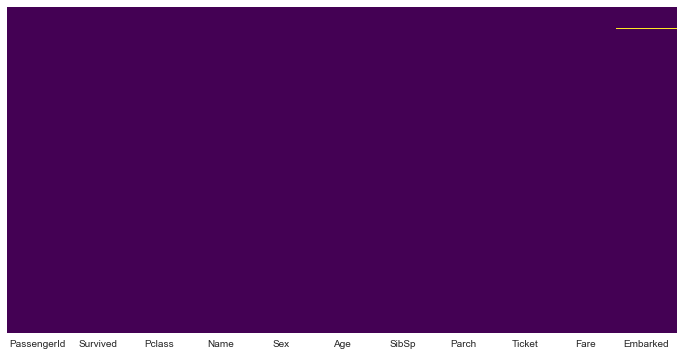

In [134]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False ,cmap='viridis')

In [135]:
train.dropna(inplace=True)

In [136]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [137]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [138]:
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [139]:
train = pd.concat([train, sex, embark], axis=1)

In [140]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            373450   8.0500        S     1  0  1

In [141]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace = True)

In [142]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [144]:
train.drop('PassengerId',axis=1, inplace=True)

In [147]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [153]:
train.select_dtypes('number').head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [154]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [157]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
model = LogisticRegression()

In [162]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
predictions = model.predict(X_test)

In [166]:
predictions[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [168]:
from sklearn.metrics import classification_report

In [172]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.81      0.89      0.85       211
           1       0.81      0.69      0.75       145

    accuracy                           0.81       356
   macro avg       0.81      0.79      0.80       356
weighted avg       0.81      0.81      0.81       356



In [173]:
from sklearn.metrics import confusion_matrix

In [174]:
confusion_matrix(y_test, predictions)

array([[188,  23],
       [ 45, 100]], dtype=int64)

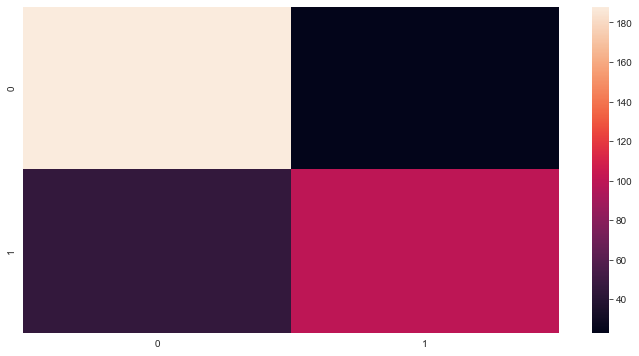

In [175]:
sns.heatmap(confusion_matrix(y_test, predictions))